# Starter Libraries and Dataset load

In [1]:
# Import Libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [4]:
# Load Dataset

df = pd.read_csv(r"C:\Users\justi\Documents\Project\SoCS\Python\Soil pH Dataset.csv")
df.head()

,ID,EC,OM,BD,P,SAND,SILT,CLAY,N,K,Ca,Mg,Na,CEC,SAR,ESP,Class.pH
0,31.12,1.4,2.4,1.4,21.0,65.5,16.7,17.8,0.0,0.4,3.1,2.9,0.4,8.9,0.1,0.0,Moderately acidic
1,2.00,0.4,1.3,1.3,10.5,18.2,30.0,51.8,0.1,2.1,54.1,3.4,5.9,40.7,0.2,0.1,Strongly alkaline
2,4.10,1.1,1.2,1.4,6.3,26.2,20.2,21.8,0.1,2.3,23.8,3.6,0.3,18.9,0.0,0.0,Moderately alkaline
3,6.00,0.4,3.2,1.3,4.2,32.9,26.0,41.1,0.1,1.8,91.5,10.6,0.2,36.3,0.0,0.0,Moderately alkaline
4,7.00,0.9,1.2,1.7,5.2,64.2,22.7,13.1,0.1,0.9,5.9,3.0,0.2,9.9,0.1,0.0,Moderately acidic


# Data Collection

Here are list of journals for extreme_ranges collection. The collection of extreme ranges is for outliers detection.


[EC](https://www.nrcs.usda.gov/sites/default/files/2022-10/Soil%20Electrical%20Conductivity.pdf)

[BD](https://www.nrcs.usda.gov/sites/default/files/2022-10/Soil%20Bulk%20Density%20Moisture%20Aeration.pdf)

[P](https://pmc.ncbi.nlm.nih.gov/articles/PMC9564468/pdf/ijerph-19-12262.pdf)

[N](https://www.researchgate.net/figure/The-amount-of-total-nitrogen-in-the-topsoil-0-15-cm-and-subsoil-15-30-cm-as_fig3_326662131)

[SAR](https://www.mdpi.com/2076-3263/12/11/415)

[ESP](https://www.researchgate.net/publication/237610301_Prediction_of_Soil_Exchangeable_Sodium_Percentage_Based_on_Soil_Sodium_Adsorption_Ratio)

However some of features (OM and base cations) are very different in different types of soil, so there isn't any extreme ranges for those. However, in some features, the distribution is the same across many types of soil so we just get the approximate extreme ranges from the distribution.



In [5]:
extreme_ranges = {
    "EC": (0, 20),
    "BD": (0, 2.0),
    "P": (0, 350),
    "N": (0, 2.1),
    "SAR": (0, 26),
    "ESP": (0, 1),
}

# Data Understanding

In [6]:
#Display (rows, columns)

df.shape

(3022, 17)

In [7]:
# Display all columns
all_columns = list(df.columns)
print(all_columns)

['ID', 'EC', 'OM', 'BD', 'P', 'SAND', 'SILT', 'CLAY', 'N', 'K', 'Ca', 'Mg', 'Na', 'CEC', 'SAR', 'ESP', 'Class.pH']




> output understanding



In [8]:
# Output class
df['Class.pH'].unique()

array(['Moderately acidic', 'Strongly alkaline', 'Moderately alkaline',
       'Neutral', 'Strongly acidic', nan], dtype=object)

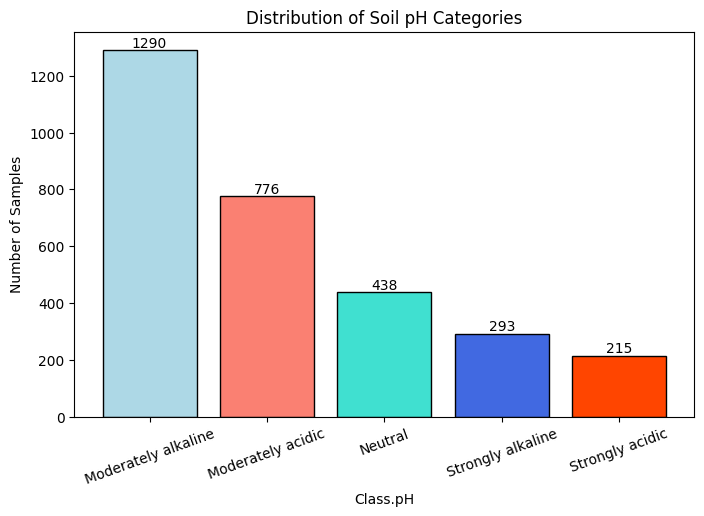

In [9]:
# Visualization of category distribution
counts = df["Class.pH"].value_counts()

import matplotlib.pyplot as plt

colors = ["lightblue", "salmon", "turquoise", "royalblue", "orangered"]
plt.figure(figsize=(8,5))
bars = plt.bar(counts.index, counts.values, color=colors, edgecolor="black")

plt.xticks(rotation=20)
plt.title("Distribution of Soil pH Categories")
plt.xlabel("Class.pH")
plt.ylabel("Number of Samples")

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             str(bar.get_height()), ha='center', va='bottom')

plt.show()

In [10]:
# Imbalance ratio

counts = df["Class.pH"].value_counts()
imbalance_ratio = counts.max() / counts.min()
print("Imbalance ratio:", imbalance_ratio)

Imbalance ratio: 6.0


Analysis: Data distribution is imbalanced. Proven by the visualization and Imbalance ratio is 6, which indicates a big data imbalanced.





> Variable Values Distribution





In [11]:
#initial drop

df = df.reset_index(drop=True)
df = df.drop(columns=["ID"])

In [12]:
# Soil Dataset Variables & Units

#Notes from committee:
# EC   : dS m⁻¹ (Saturation extract) → Konduktivitas listrik, indikator salinitas
# OM   : mass % (Walkley-Black) → Bahan organik tanah
# BD   : g cm⁻³ (Cylinder method) → Massa tanah kering per volume
# N    : mass % (Wet digestion + Kjeldahl distillation) → Kandungan nitrogen
# P    : mg kg⁻¹ (Olsen/Bray) → Kandungan fosfor
# K    : Cmol(+) kg⁻¹ (Ammonium acetate pH 7.0, Flame photometry/AAS) → Kalium
# Ca   : Cmol(+) kg⁻¹ (Ammonium acetate pH 7.0, AAS/Flame photometry) → Kalsium
# Mg   : Cmol(+) kg⁻¹ (Ammonium acetate pH 7.0, AAS/Flame photometry) → Magnesium
# Na   : Cmol(+) kg⁻¹ (Ammonium acetate pH 7.0, Flame photometry/AAS) → Natrium
# CEC  : Cmol(+) kg⁻¹ (Ammonium acetate AS-12) → Kapasitas tukar kation
# SAND : mass % (Bouyoucos hydrometer) → Persentase pasir
# SILT : mass % (Bouyoucos hydrometer) → Persentase debu
# CLAY : mass % (Bouyoucos hydrometer) → Persentase liat
# SAR  : Sodium Adsorption Ratio → Perbandingan Na terhadap Ca & Mg
# ESP  : Exchangeable Sodium Percentage → Persentase Na dapat ditukar
# Class.pH : Kategori pH tanah (target, nilai numerik asli tidak disertakan)

df.describe()

,EC,OM,BD,P,SAND,SILT,CLAY,N,K,Ca,Mg,Na,CEC,SAR,ESP
count,3017.000000,3019.000000,3016.000000,2903.000000,3021.000000,3021.000000,3021.000000,3014.000000,3008.000000,3009.000000,3008.000000,3008.000000,3009.00000,3008.000000,3008.000000
mean,1.109195,3.124008,2.213316,22.845532,37.125654,22.062469,36.831314,0.502741,2.994927,21.056677,4.800233,6.007141,24.84563,0.179255,0.065392
std,3.324244,3.643582,5.015036,40.721598,19.183357,10.304526,16.862349,3.351938,7.071810,20.777854,4.456724,11.340342,17.39629,0.682404,0.216978
min,0.000000,0.100000,0.500000,0.000000,0.800000,1.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.300000,1.500000,1.300000,5.200000,21.500000,15.100000,23.100000,0.100000,0.600000,4.900000,1.900000,0.400000,12.00000,0.000000,0.000000
50%,0.400000,2.300000,1.300000,12.100000,34.900000,21.300000,34.700000,0.100000,1.100000,15.000000,3.450000,0.900000,21.60000,0.000000,0.000000
75%,0.800000,3.600000,1.400000,26.450000,51.500000,28.000000,49.800000,0.100000,1.800000,32.300000,6.300000,2.500000,33.10000,0.100000,0.100000
max,65.400000,37.900000,31.120000,857.100000,100.000000,69.300000,83.200000,31.120000,31.120000,326.400000,34.200000,184.900000,128.70000,16.300000,7.300000


In [13]:
#Classify skewness

num_cols = df.select_dtypes(include="number").columns

# Helper: binned mode (for mode in continuous values)
def binned_mode(s, bins=30):
    x = s.dropna().values
    if x.size == 0:
        return np.nan
    counts, edges = np.histogram(x, bins=bins)
    i = counts.argmax()
    # return bin center as "mode" estimate
    return (edges[i] + edges[i+1]) / 2

summary = pd.DataFrame(index=num_cols)
summary["mean"]   = df[num_cols].mean() #same as above (mean)
summary["median"] = df[num_cols].median() #same as above (50%)

#use binned_mode for continuous distribution mode estimate
summary["mode≈"]  = [binned_mode(df[c], bins=30) for c in num_cols]
summary["skew"]   = df[num_cols].skew()

delta = summary["mean"] - summary["median"]
summary["skew_dir"] = np.select(
    [summary["skew"] > 0.5, summary["skew"] < -0.5, abs(delta) <= 1e-9],
    ["right (+)", "left (−)", "≈ symmetric"],
    default=np.where(delta > 0, "right (+)", "left (−)")
)

summary.round(4)

,mean,median,mode≈,skew,skew_dir
EC,1.1092,0.40,1.0900,10.1805,right (+)
OM,3.1240,2.30,1.9900,5.5027,right (+)
BD,2.2133,1.30,1.0103,5.5875,right (+)
P,22.8455,12.10,14.2850,7.5649,right (+)
SAND,37.1257,34.90,25.6000,0.3765,right (+)
SILT,22.0625,21.30,18.1500,0.5637,right (+)
CLAY,36.8313,34.70,29.1200,0.3350,right (+)
N,0.5027,0.10,0.5187,8.7284,right (+)
K,2.9949,1.10,0.5187,3.6193,right (+)
Ca,21.0567,15.00,5.4400,2.7847,right (+)


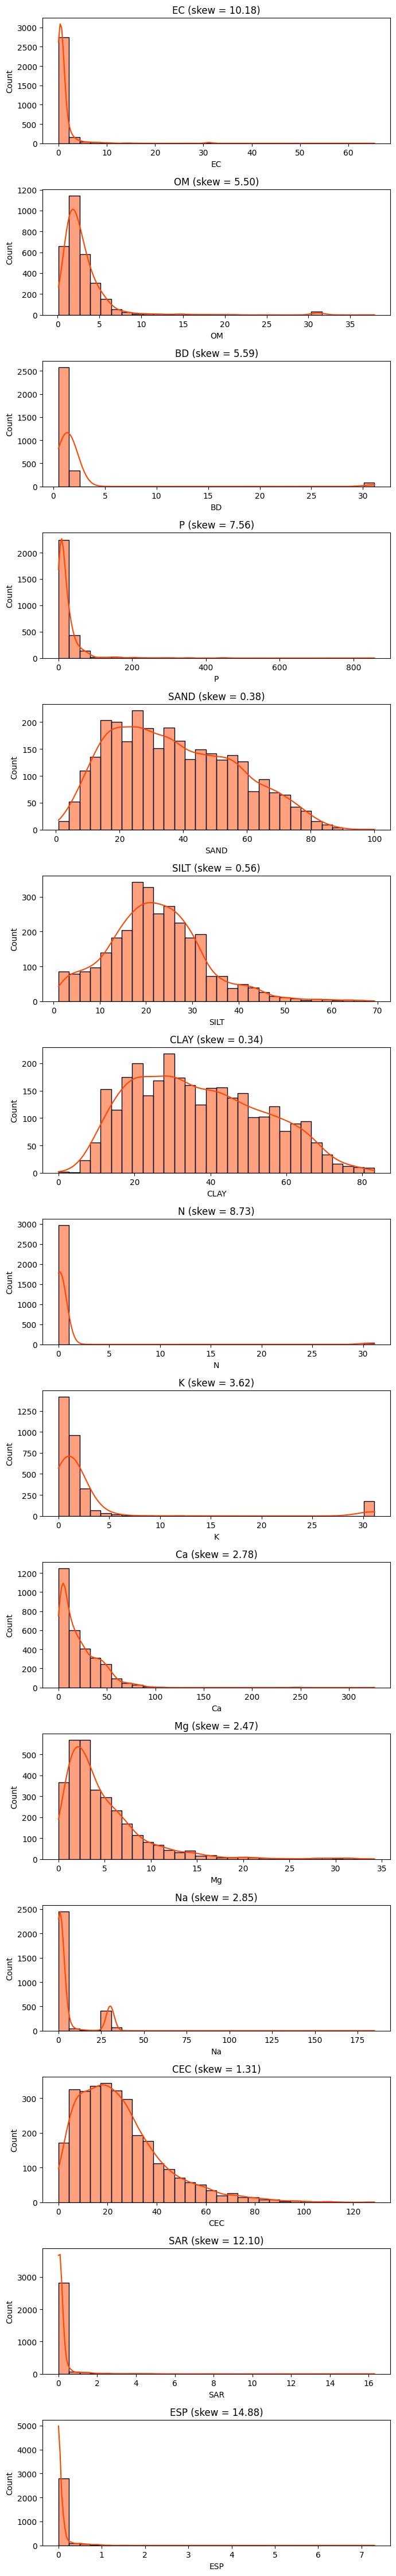

In [14]:
num_cols = df.select_dtypes(include=[float, int]).columns

fig, axes = plt.subplots(len(num_cols), 1, figsize=(7, 3*len(num_cols)))
for i, c in enumerate(num_cols):
    sns.histplot(df[c], kde=True, bins=30, ax=axes[i], color="orangered", edgecolor="black")
    axes[i].set_title(f"{c} (skew = {df[c].skew():.2f})")
plt.tight_layout()
plt.show()

Conclusion: Right skewness indicates median < mean and values distribution is mostly in the right side.
Hence for outliers deletion, we'll use IQR and for imputation, we'll prefer using median.



> Null Values Distribution



In [15]:
df.isnull().sum()

EC            5
OM            3
BD            6
P           119
SAND          1
SILT          1
CLAY          1
N             8
K            14
Ca           13
Mg           14
Na           14
CEC          13
SAR          14
ESP          14
Class.pH     10
dtype: int64

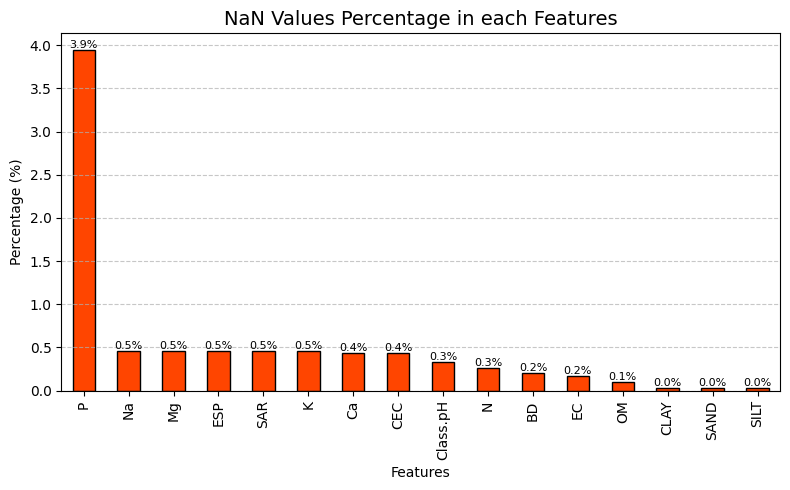

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

missing_counts = df.isna().sum()
missing_percent = round(100 * (missing_counts / len(df.index)), 2)
missing_sorted = missing_percent.sort_values(ascending=False)

plt.figure(figsize=(8, 5))
ax = missing_sorted.plot.bar(color='orangered', edgecolor='black')

for bar, percent in zip(ax.patches, missing_sorted):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height,
            f'{percent:.1f}%', ha='center', va='bottom', fontsize=8)

plt.title("NaN Values Percentage in each Features", fontsize=14)
plt.ylabel("Percentage (%)")
plt.xlabel("Features")
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

missing_data = missing_sorted[missing_percent > 0].sort_values(ascending=False)

Conclusion: The missing values percentages are small.

# Output Preprocessing

In [16]:
# Delete null output values (Better if not used)

df.dropna(subset=["Class.pH"], inplace=True)
print("Viewing the null values after output null values removal:\n")
df.isnull().sum()

Viewing the null values after output null values removal:



EC            5
OM            3
BD            6
P           119
SAND          1
SILT          1
CLAY          1
N             4
K             8
Ca            7
Mg            7
Na            7
CEC           7
SAR           7
ESP           7
Class.pH      0
dtype: int64

In [17]:
# Encode categorical values (for easier understanding)

ph_labels = {
    'Strongly acidic': 0,
    'Moderately acidic': 1,
    'Neutral': 2,
    'Moderately alkaline': 3,
    'Strongly alkaline': 4
}

df['Class.pH_num'] = df['Class.pH'].map(ph_labels)
df.drop(columns=["Class.pH"], inplace=True)

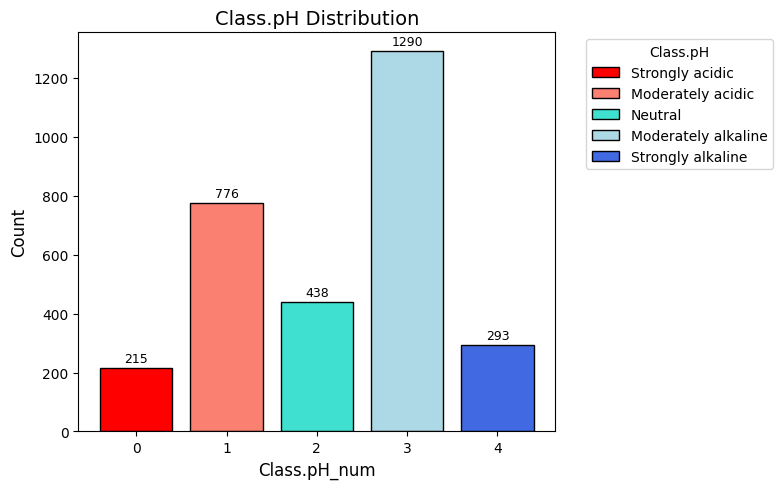

In [18]:
# Visualization of soil pH distribution after encoded

counts = df["Class.pH_num"].value_counts().sort_index()

colors = ["red", "salmon", "turquoise", "lightblue", "royalblue"]
plt.figure(figsize=(8,5))
bars = plt.bar(counts.index, counts.values, color=colors, edgecolor="black")

plt.title("Class.pH Distribution", fontsize=14)
plt.xlabel("Class.pH_num", fontsize=12)
plt.ylabel("Count", fontsize=12)

for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+10,
             str(int(bar.get_height())),
             ha="center", va="bottom", fontsize=9)

# Reverse mapping num → label
ph_labels_rev = {v: k for k, v in ph_labels.items()}
plt.legend(
    bars,
    [ph_labels_rev[i] for i in counts.index],
    title="Class.pH",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

plt.tight_layout()
plt.show()

# Data Preprocessing

In [19]:
#define list of variables (features)
features = ["EC","OM","BD","P","SAND","SILT","CLAY",
            "N","K","Ca","Mg","Na","CEC","SAR","ESP"]

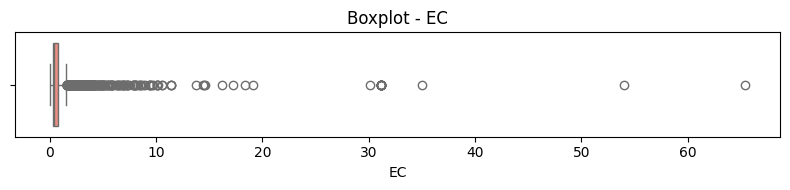

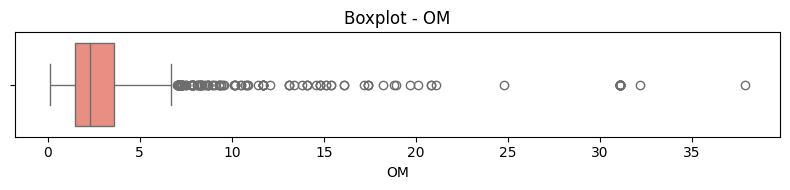

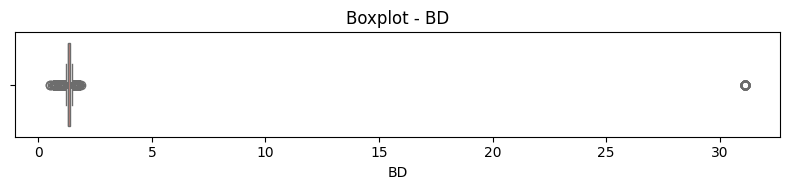

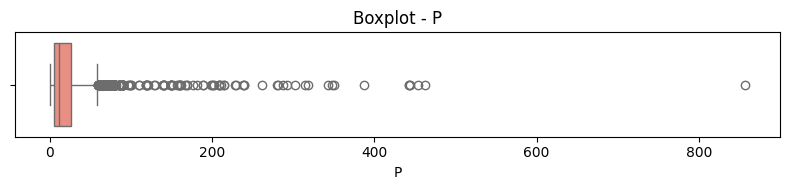

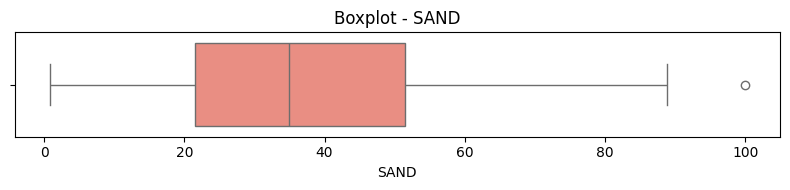

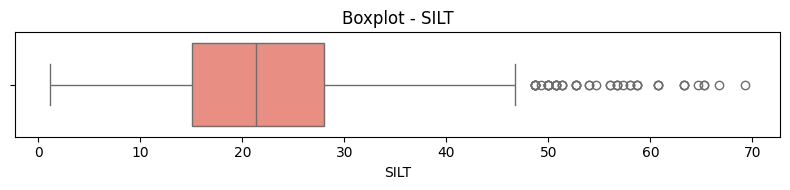

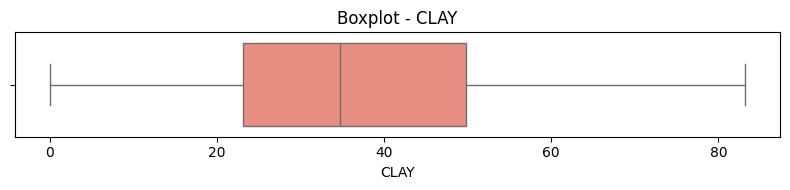

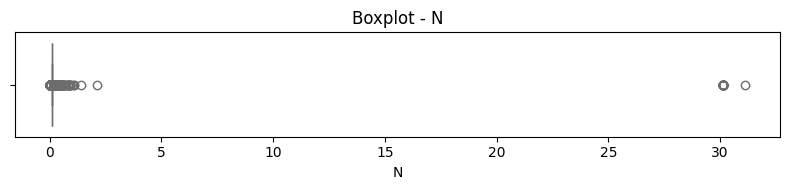

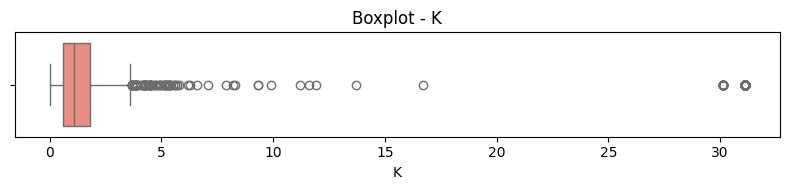

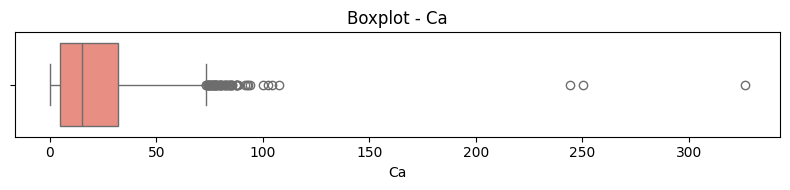

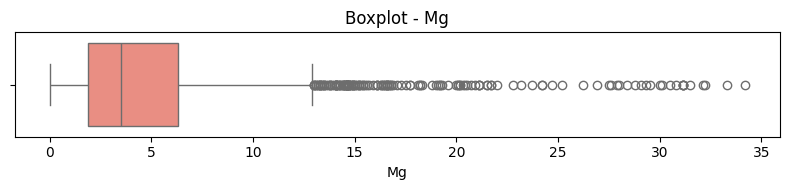

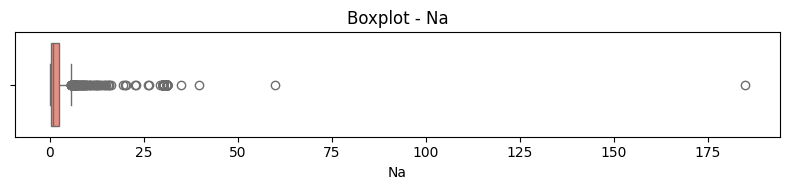

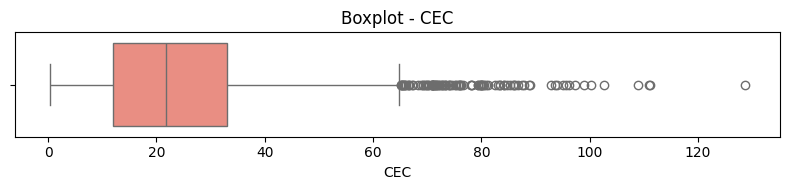

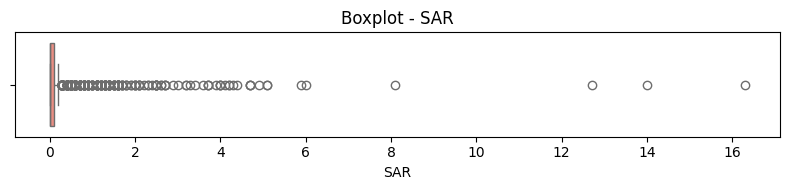

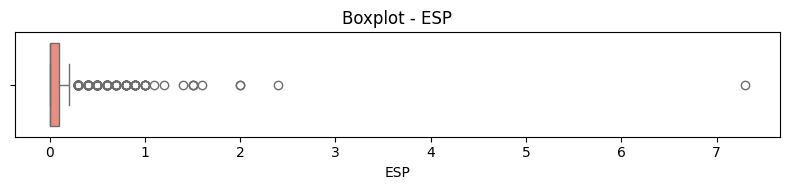

In [20]:
#boxplot for detecting outliers (for iqr outliers deletion)
for col in features:
    if df[col].dropna().empty:
        print(f"Skipping {col} (all NaN)")
        continue

    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df[col], color='salmon')
    plt.title(f'Boxplot - {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [21]:
#IQR outliers deletion

print("Remaining rows before IQR filtering:", len(df))

df_iqr = df.copy()
for col in features:
    if col in df_iqr.columns:
        Q1 = df_iqr[col].quantile(0.25)
        Q3 = df_iqr[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_iqr = df_iqr[(df_iqr[col].isnull()) | ((df_iqr[col] >= lower_bound) & (df_iqr[col] <= upper_bound))]

print("Remaining rows after IQR filtering:", len(df_iqr))

Remaining rows before IQR filtering: 3012
Remaining rows after IQR filtering: 532


Since IQR is overkill. We'll try z-score method.

In [22]:
#z-score outliers deletion

z_scores = np.abs((df[features] - df[features].mean()) / df[features].std())
threshold = 4

# Clear those outside the threshold (Considered outliers)
df_z = df[(z_scores <= threshold).all(axis=1)].copy()

print("Remaining rows before z-score filtering:", df.shape[0])
print("Remaining rows after z-score filtering:", df_z.shape[0])

Remaining rows before z-score filtering: 3012
Remaining rows after z-score filtering: 2587


z-score is more suited towards extreme values since it got threshold, which is nice. Now that the outliers is deleted, now we shall compare the data dictribution to extreme_range, indicates if there is an single data outside the range, it could be an outliers. But if there are groups, we shall consider it very extreme cases. (So our model performance could handle even wider range of scenario)

In [23]:
df

,EC,OM,BD,P,SAND,SILT,CLAY,N,K,Ca,Mg,Na,CEC,SAR,ESP,Class.pH_num
0,1.4,2.40,1.4,21.0,65.5,16.7,17.8,0.0,0.40,3.1,2.9,0.4,8.9,0.1,0.0,1
1,0.4,1.30,1.3,10.5,18.2,30.0,51.8,0.1,2.10,54.1,3.4,5.9,40.7,0.2,0.1,4
2,1.1,1.20,1.4,6.3,26.2,20.2,21.8,0.1,2.30,23.8,3.6,0.3,18.9,0.0,0.0,3
3,0.4,3.20,1.3,4.2,32.9,26.0,41.1,0.1,1.80,91.5,10.6,0.2,36.3,0.0,0.0,3
4,0.9,1.20,1.7,5.2,64.2,22.7,13.1,0.1,0.90,5.9,3.0,0.2,9.9,0.1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3017,0.2,31.12,1.6,24.2,52.2,23.1,23.8,0.1,0.80,5.4,4.6,0.6,10.8,0.1,0.1,1
3018,0.5,1.50,1.5,6.4,36.0,45.3,18.7,0.2,31.12,18.4,4.7,0.6,6.3,0.0,0.1,3
3019,1.0,1.80,1.5,6.4,12.0,27.3,60.7,0.2,0.30,12.4,1.4,0.1,31.9,0.0,0.0,3
3020,0.5,1.80,1.3,6.4,10.0,27.3,62.7,0.2,1.20,10.2,1.8,0.3,17.9,0.0,0.0,3


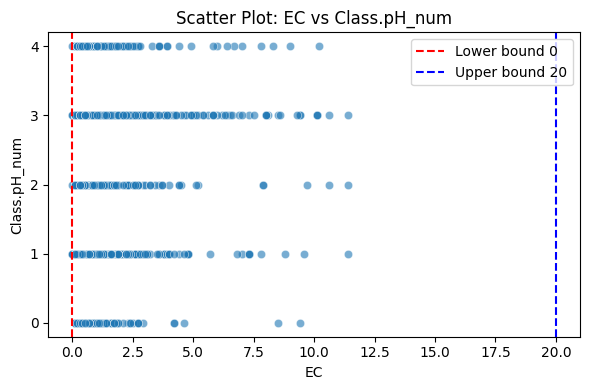

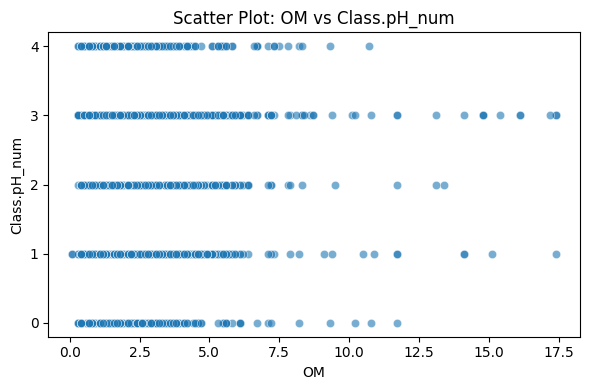

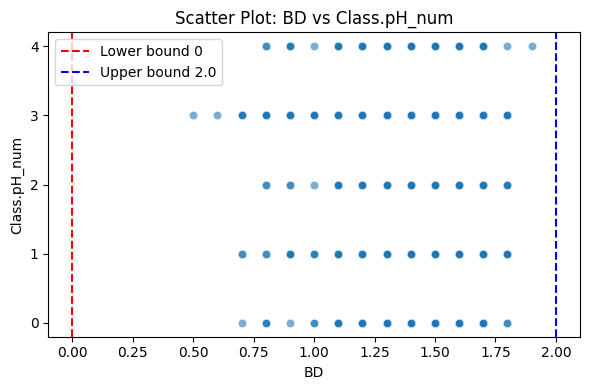

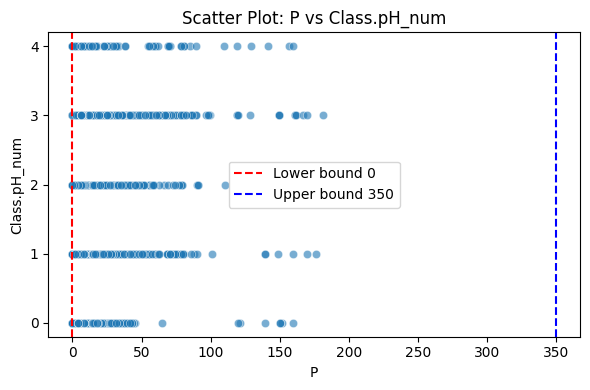

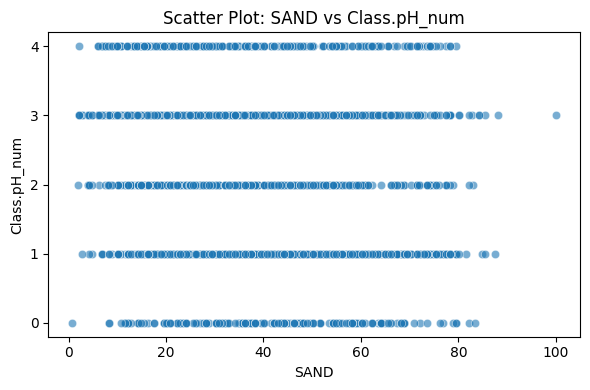

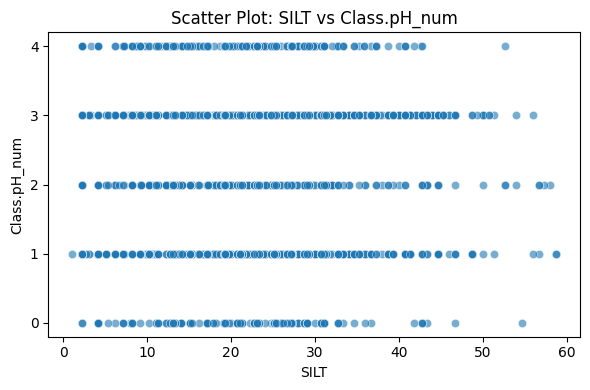

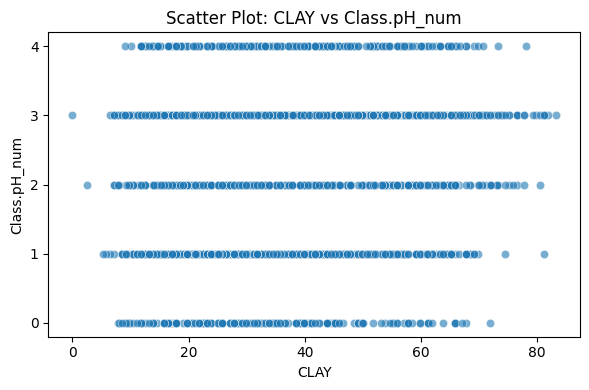

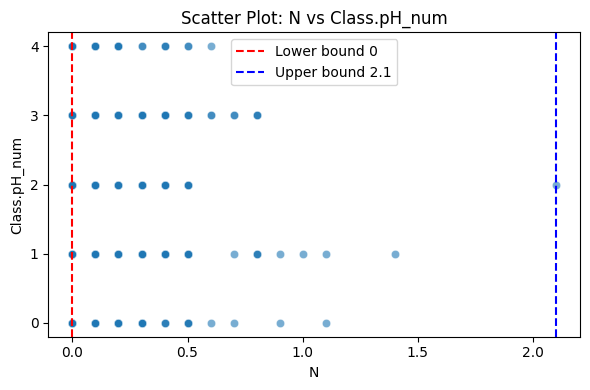

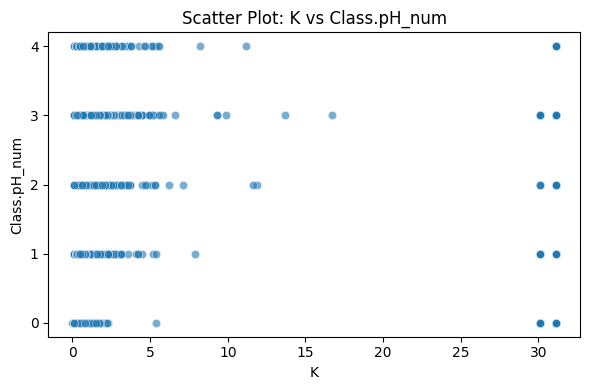

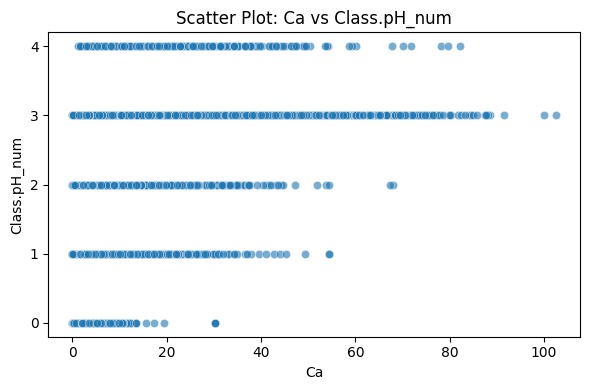

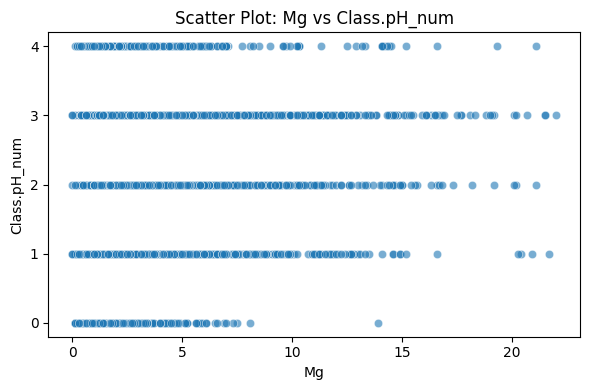

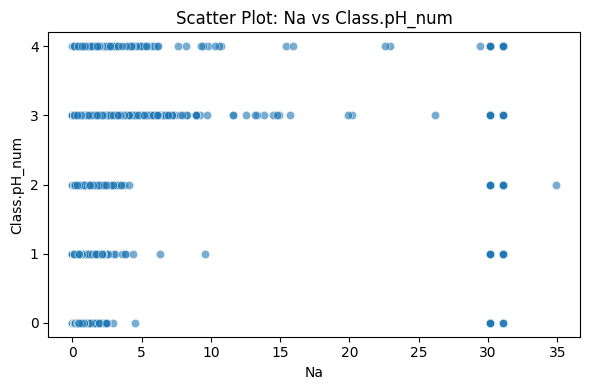

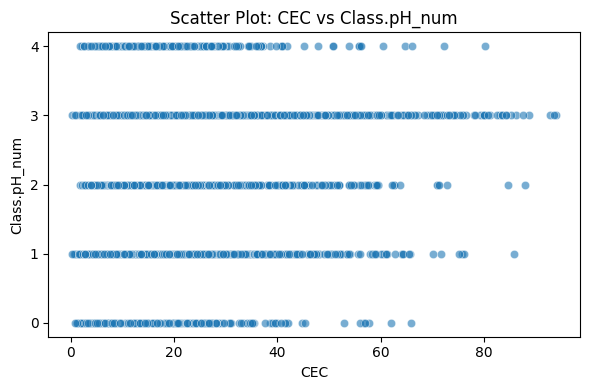

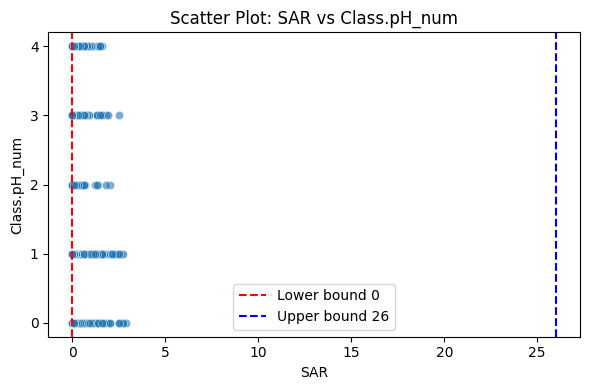

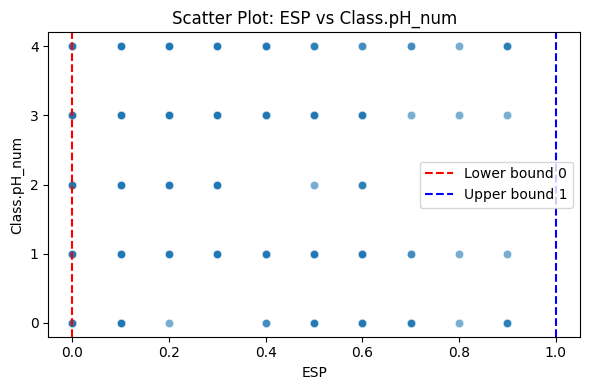

In [24]:
# Compare the distribution after outlier deletion to the journal range

for col in features :
    if col == "Class.pH_num":
        continue  # skip target

    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df_z["Class.pH_num"], alpha=0.6)

    # extreme_ranges line (based on journal)
    if col in extreme_ranges:
        low, high = extreme_ranges[col]
        plt.axvline(low, color="red", linestyle="--", label=f"Lower bound {low}")
        plt.axvline(high, color="blue", linestyle="--", label=f"Upper bound {high}")
        plt.legend()

    plt.title(f"Scatter Plot: {col} vs Class.pH_num")
    plt.xlabel(col)
    plt.ylabel("Class.pH_num")
    plt.yticks([0,1,2,3,4], ["0","1","2","3","4"])
    plt.tight_layout()
    plt.show()

Luckily, there is no extreme values those are grouped, indicates that those outliers have been deleted.

In [25]:
#Last, we perform imputation based on median values
df_imputed = df_z.copy()

# impute NaN with median values (since it is already cleaned from outliers)
for col in df_imputed.columns:
    if df_imputed[col].dtype != "object":
        median_val = df_imputed[col].median()
        df_imputed[col] = df_imputed[col].fillna(median_val)

# Exploratory Data Analysis



> Pairwise correlation



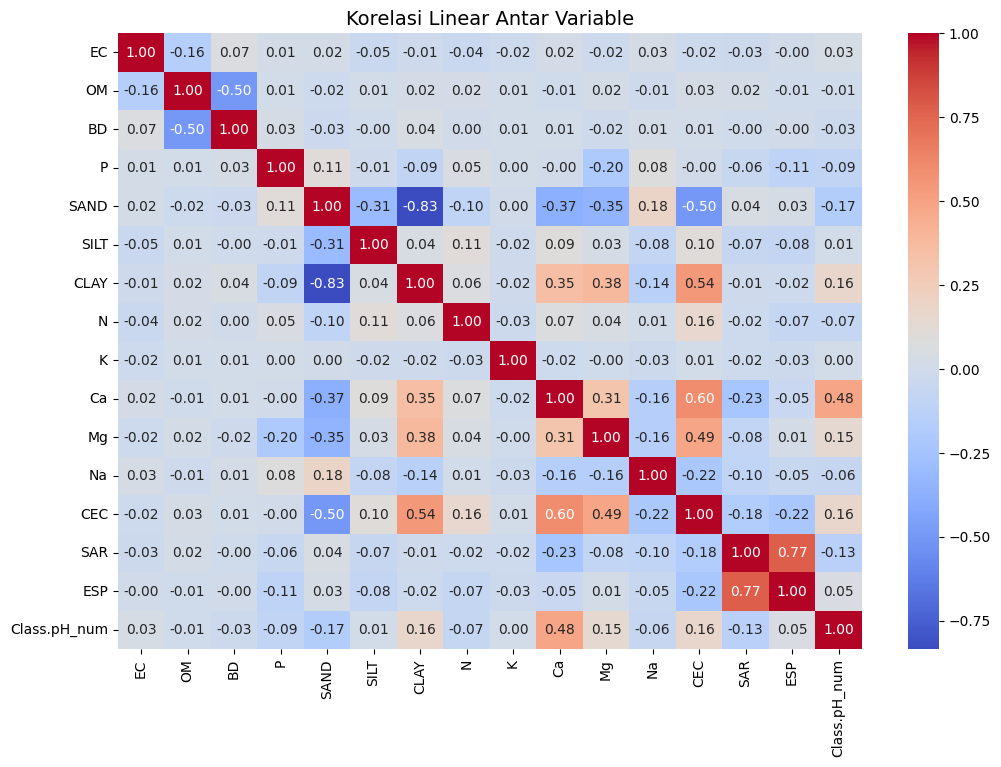

In [26]:
df_corr = df_imputed[features + ['Class.pH_num']]

corr = df_corr.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korelasi Linear Antar Variable", fontsize=14)
plt.show()

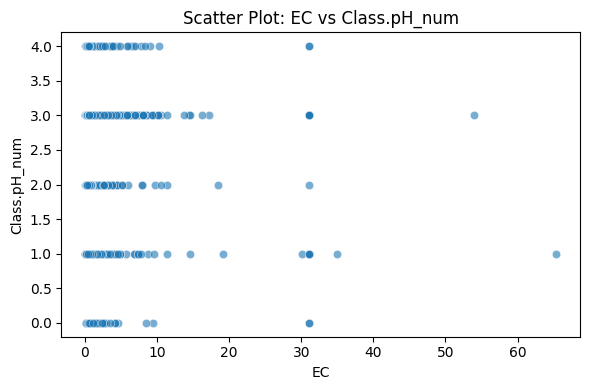

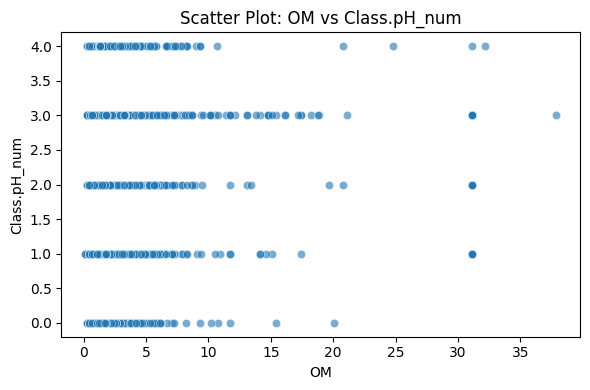

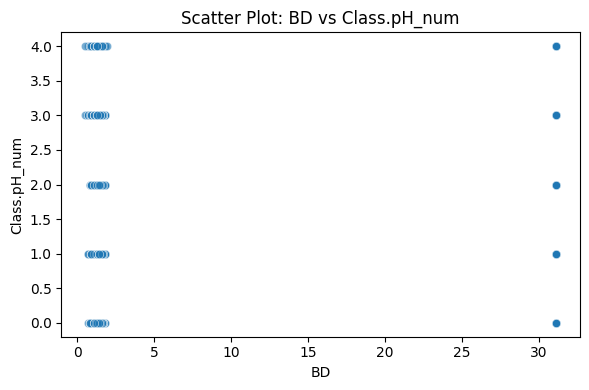

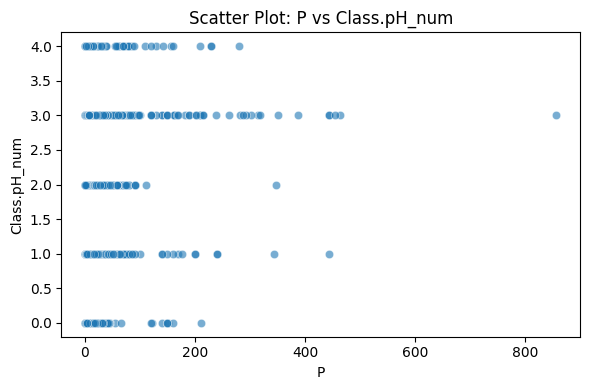

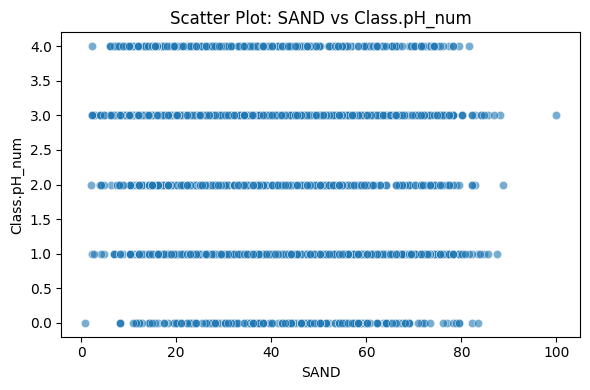

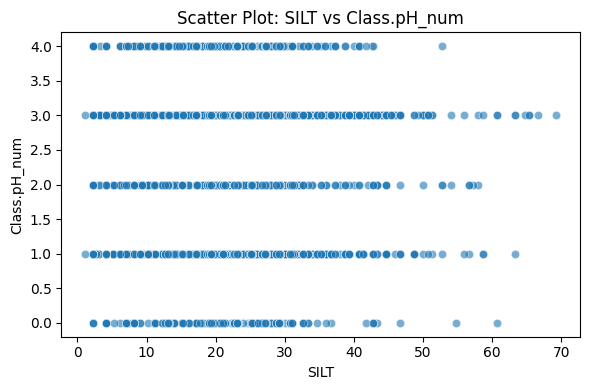

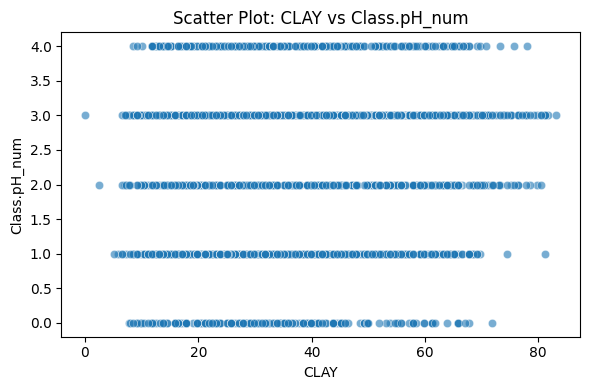

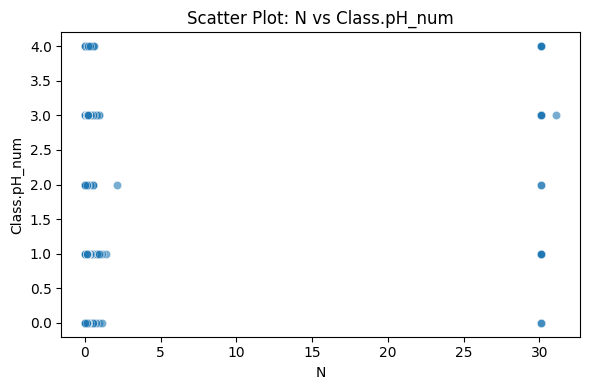

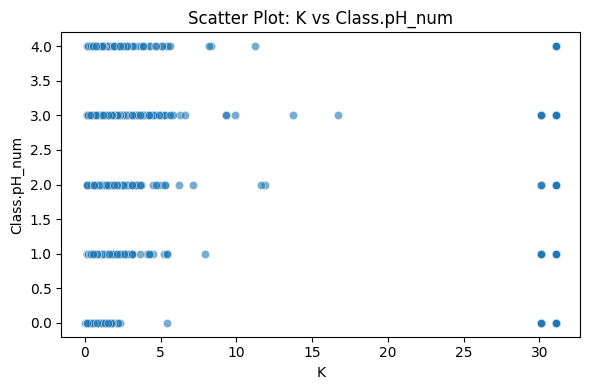

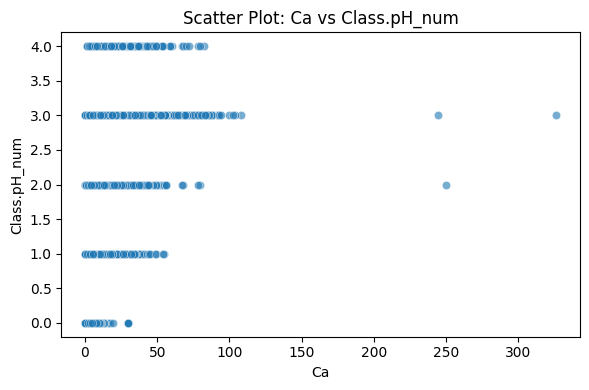

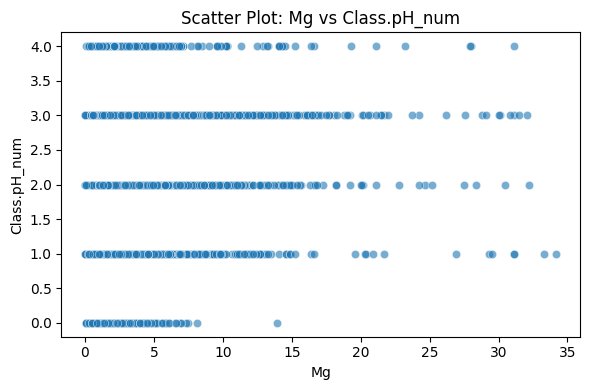

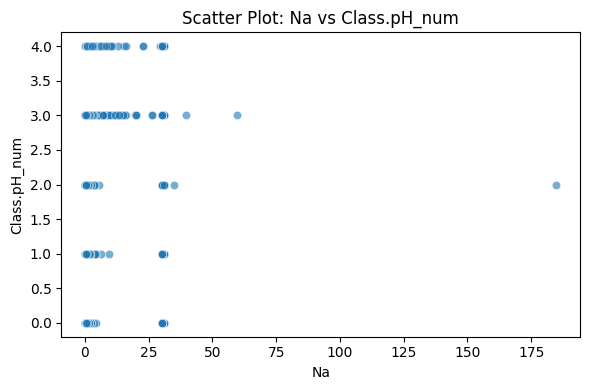

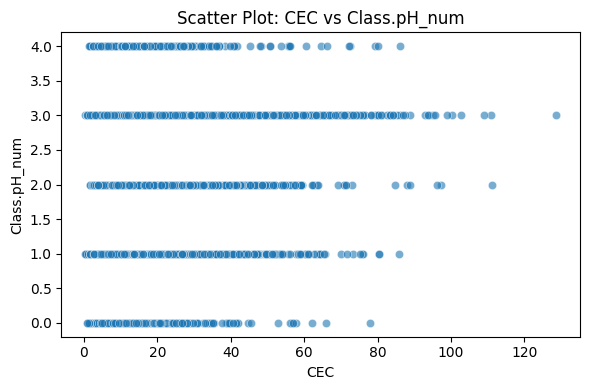

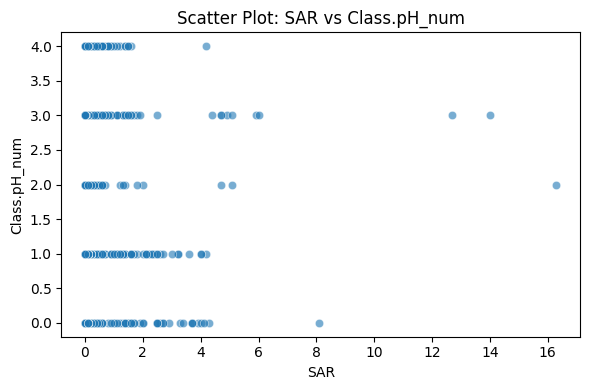

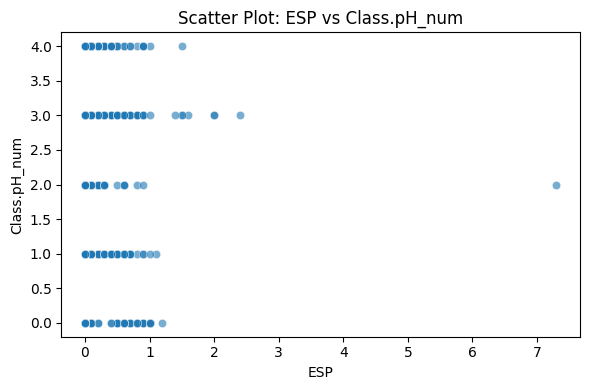

In [27]:
for col in features:
    if col == "Class.pH_num":
        continue  # skip target

    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df["Class.pH_num"], alpha=0.6)
    plt.title(f"Scatter Plot: {col} vs Class.pH_num")
    plt.xlabel(col)
    plt.ylabel("Class.pH_num")

    plt.tight_layout()
    plt.show()

#  Feature Engineering (Found Something Worth the Attention)

As we know, ESP is Na% of all CEC. With the function as below:


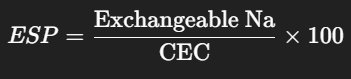

Hence, we could modify the equation to get Exchangeable Na which should be simillar to our Na values.

We start with calculating ESP_calculated values then compare it with dataset ESP values

In [28]:
df_compare = df_imputed.copy()
df_compare['ESP_calculated'] = df_imputed["Na"] / df_imputed["CEC"]

In [29]:
df_compare[["ESP", "ESP_calculated"]]

,ESP,ESP_calculated
0,0.0,0.044944
1,0.1,0.144963
2,0.0,0.015873
3,0.0,0.005510
4,0.0,0.020202
...,...,...
3016,0.0,0.001938
3018,0.1,0.095238
3019,0.0,0.003135
3020,0.0,0.016760


In [30]:
corr = df_compare['ESP'].corr(df_compare['ESP_calculated'])
print(corr)

-0.053567135369648466


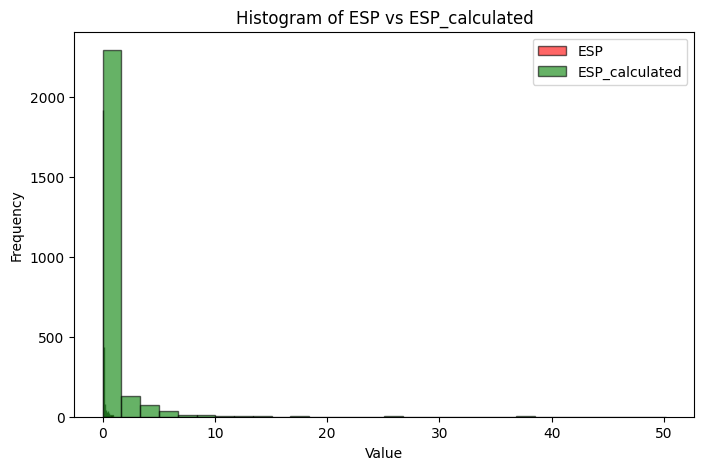

In [31]:
#Visualize distribution of ESP and ESP_calculated

plt.figure(figsize=(8,5))

plt.hist(df_compare["ESP"].dropna(), bins=30, alpha=0.6, label="ESP", color="red", edgecolor="black")
plt.hist(df_compare["ESP_calculated"].dropna(), bins=30, alpha=0.6, label="ESP_calculated", color="green", edgecolor="black")

plt.title("Histogram of ESP vs ESP_calculated")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [32]:
df_compare['Na_calculated'] = df_imputed["CEC"] * df_imputed["ESP"]

In [33]:
df_compare[["Na", "Na_calculated"]]

,Na,Na_calculated
0,0.4,0.00
1,5.9,4.07
2,0.3,0.00
3,0.2,0.00
4,0.2,0.00
...,...,...
3016,0.1,0.00
3018,0.6,0.63
3019,0.1,0.00
3020,0.3,0.00


In [34]:
corr = df_compare['Na'].corr(df_compare['Na_calculated'])
print(corr)

0.025470577807328015


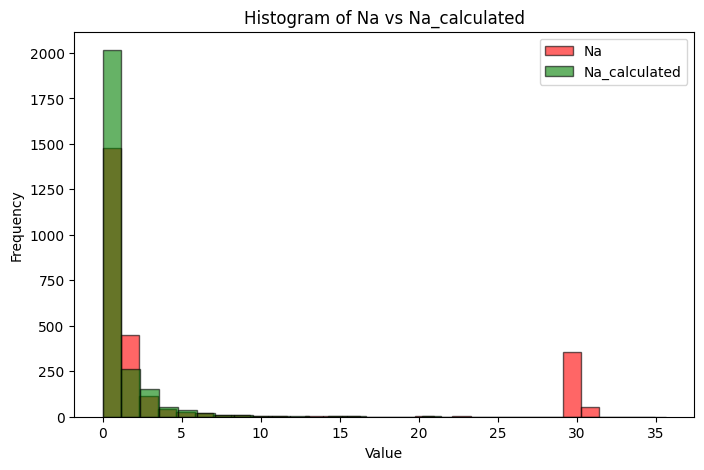

In [35]:
#Visualize distribution of Na and Na_calculated

plt.figure(figsize=(8,5))

plt.hist(df_compare["Na"].dropna(), bins=30, alpha=0.6, label="Na", color="red", edgecolor="black")
plt.hist(df_compare["Na_calculated"].dropna(), bins=30, alpha=0.6, label="Na_calculated", color="green", edgecolor="black")

plt.title("Histogram of Na vs Na_calculated")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

This is strange since the distribution of ESP is very different from calculated while Na is just a little. Then, after some analysis from our team. We got an explanation.

In [36]:
df_compare['ESP_rounded'] = df_compare['ESP_calculated'].round(1)
df_compare[["ESP", "ESP_rounded"]]

,ESP,ESP_rounded
0,0.0,0.0
1,0.1,0.1
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
3016,0.0,0.0
3018,0.1,0.1
3019,0.0,0.0
3020,0.0,0.0


But there are also cases where they're not same like this

In [37]:
df_compare[df_compare["ESP"] != df_compare["ESP_rounded"]][["ESP", "ESP_rounded"]]

,ESP,ESP_rounded
8,0.0,2.1
22,0.0,4.4
26,0.0,1.0
28,0.0,1.3
37,0.0,25.1
...,...,...
2981,0.0,3.7
2982,0.0,2.1
2987,0.0,2.5
3008,0.0,1.1


This may happens due to computational rounding. This could potentionally resulting to information loss, but could also keeps model from overfitting. We will keep this information, but for now, we will be having ESP and ESP_calculated.

In [38]:
df_imputed["ESP_calculated"] = df_compare["ESP_calculated"]

# Other Feature Engineering

In [39]:
df_new = df_imputed.copy()
df_new['BaseStat'] = df_new['Ca'] + df_new['Mg'] + df_new['K'] + df_new['Na']

df_new['% Ca'] = round(((df_new['Ca'] / df_new['BaseStat']) * 1), 4)
df_new['% Mg'] = round(((df_new['Mg'] / df_new['BaseStat']) * 1), 4)
df_new['% K'] = round(((df_new['K'] / df_new['BaseStat']) * 1), 4)
df_new = df_new.drop(columns=['BaseStat'])

df_new

,EC,OM,BD,P,SAND,SILT,CLAY,N,K,Ca,Mg,Na,CEC,SAR,ESP,Class.pH_num,ESP_calculated,% Ca,% Mg,% K
0,1.4,2.4,1.4,21.0,65.5,16.7,17.8,0.0,0.40,3.1,2.9,0.4,8.9,0.1,0.0,1,0.044944,0.4559,0.4265,0.0588
1,0.4,1.3,1.3,10.5,18.2,30.0,51.8,0.1,2.10,54.1,3.4,5.9,40.7,0.2,0.1,4,0.144963,0.8260,0.0519,0.0321
2,1.1,1.2,1.4,6.3,26.2,20.2,21.8,0.1,2.30,23.8,3.6,0.3,18.9,0.0,0.0,3,0.015873,0.7933,0.1200,0.0767
3,0.4,3.2,1.3,4.2,32.9,26.0,41.1,0.1,1.80,91.5,10.6,0.2,36.3,0.0,0.0,3,0.005510,0.8790,0.1018,0.0173
4,0.9,1.2,1.7,5.2,64.2,22.7,13.1,0.1,0.90,5.9,3.0,0.2,9.9,0.1,0.0,1,0.020202,0.5900,0.3000,0.0900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3016,0.6,1.8,1.6,19.3,38.2,19.3,42.5,0.1,1.50,69.5,5.5,0.1,51.6,0.0,0.0,3,0.001938,0.9073,0.0718,0.0196
3018,0.5,1.5,1.5,6.4,36.0,45.3,18.7,0.2,31.12,18.4,4.7,0.6,6.3,0.0,0.1,3,0.095238,0.3356,0.0857,0.5677
3019,1.0,1.8,1.5,6.4,12.0,27.3,60.7,0.2,0.30,12.4,1.4,0.1,31.9,0.0,0.0,3,0.003135,0.8732,0.0986,0.0211
3020,0.5,1.8,1.3,6.4,10.0,27.3,62.7,0.2,1.20,10.2,1.8,0.3,17.9,0.0,0.0,3,0.016760,0.7556,0.1333,0.0889


Finally, after we are done with feature engineering, let's recheck our variable correlation

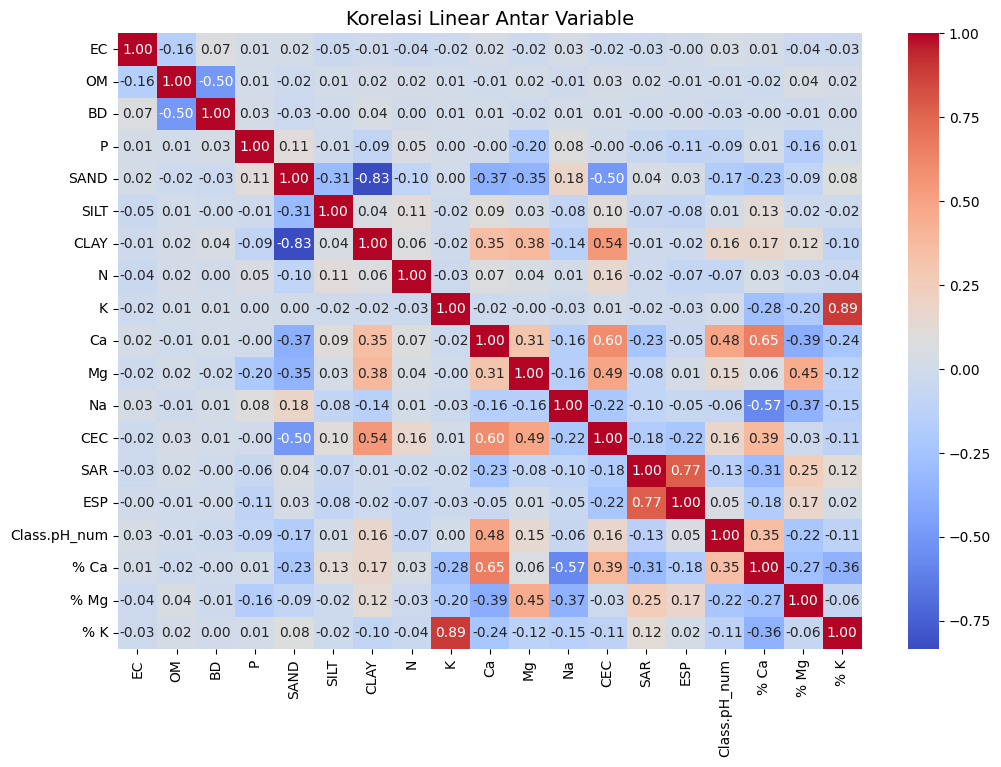

In [40]:
df_corr = df_new[features + ['Class.pH_num', '% Ca', '% Mg', '% K']]

corr = df_corr.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korelasi Linear Antar Variable", fontsize=14)
plt.show()

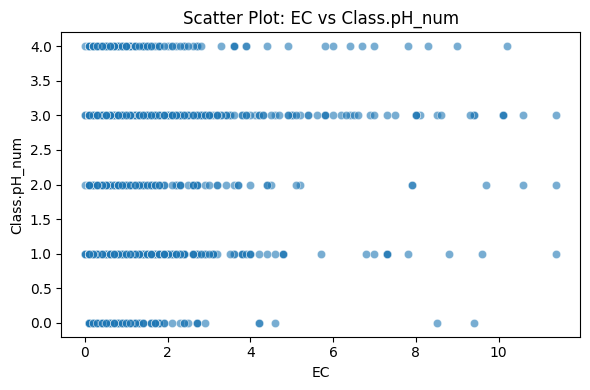

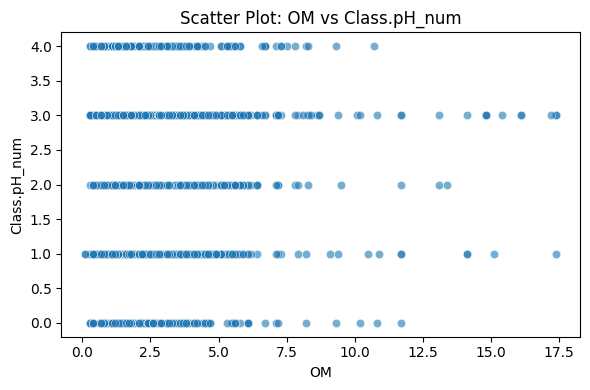

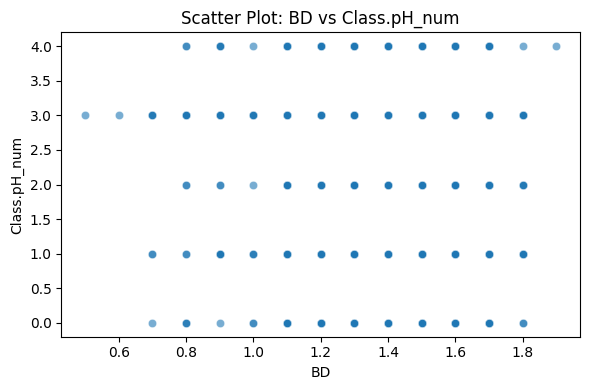

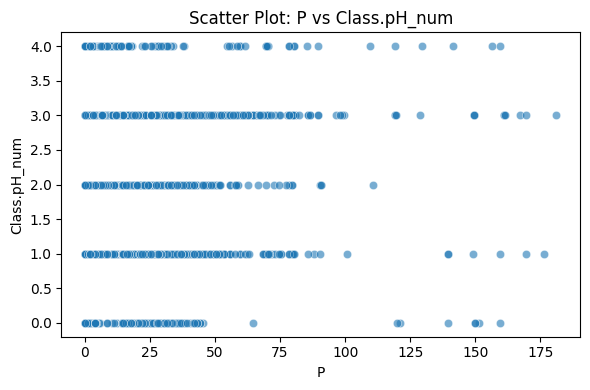

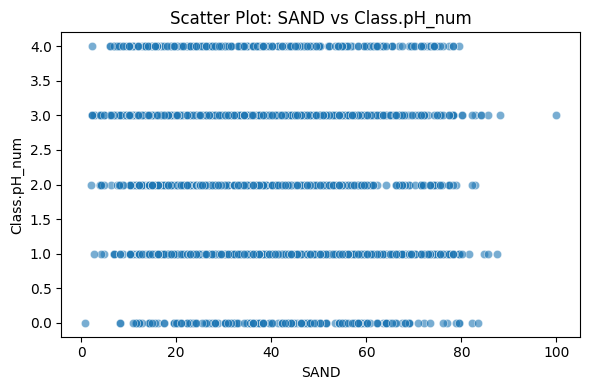

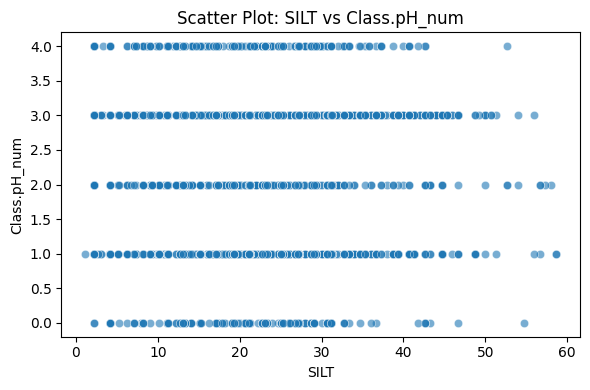

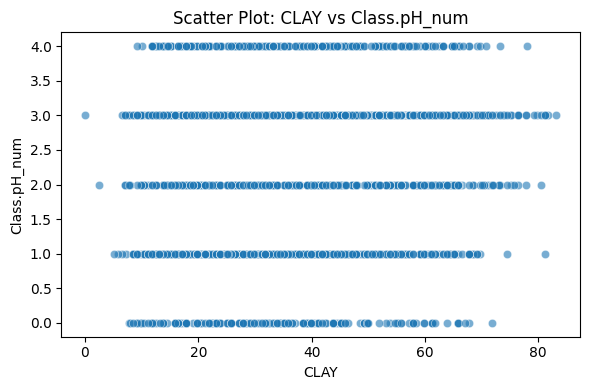

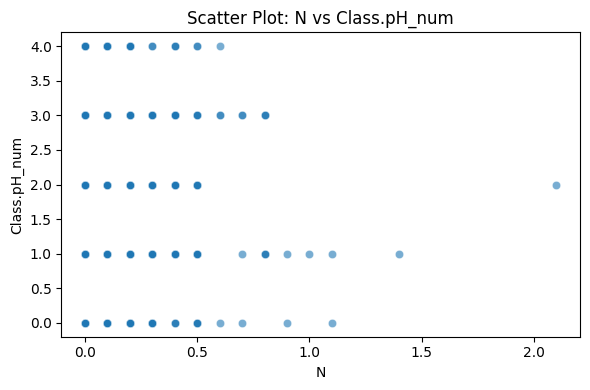

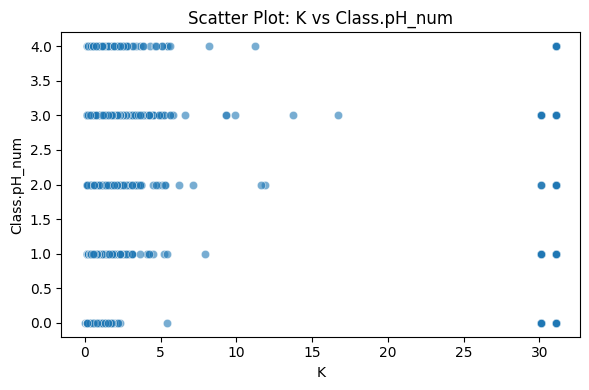

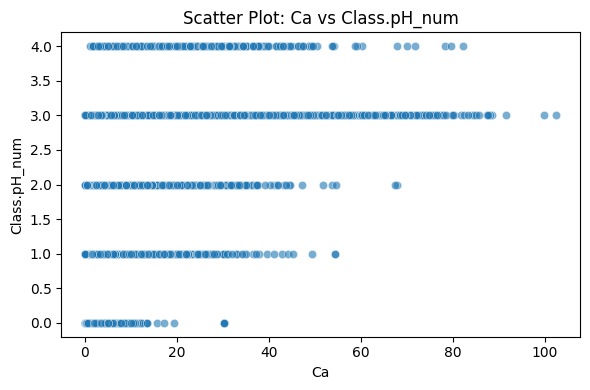

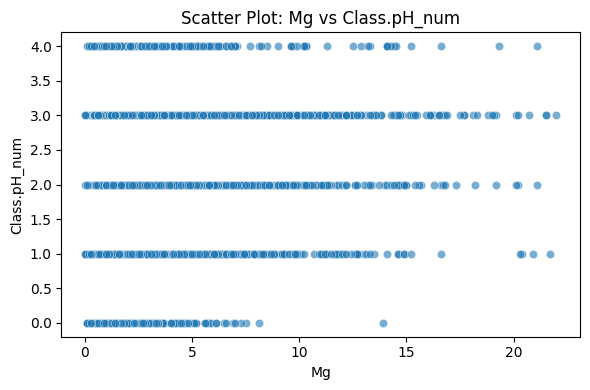

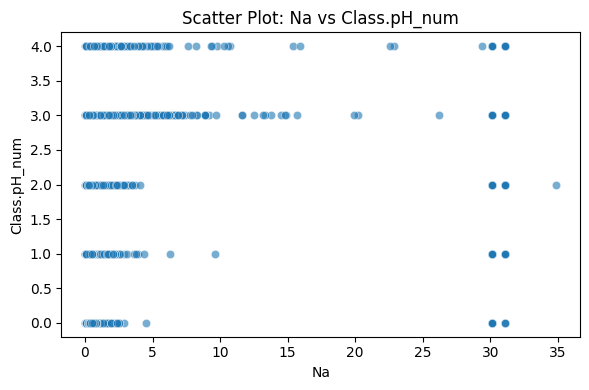

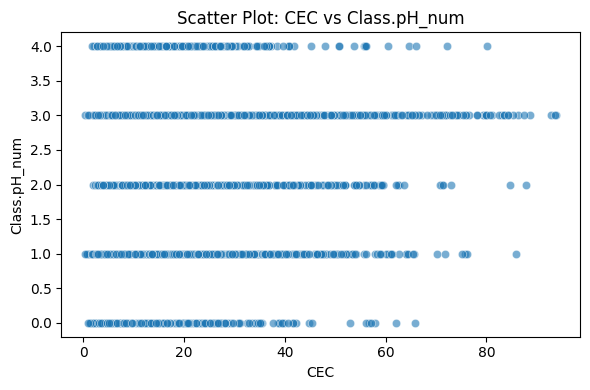

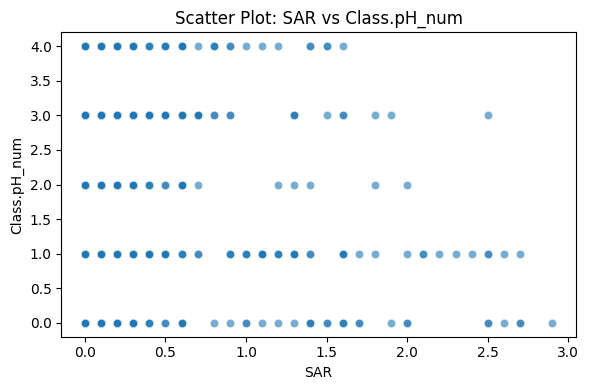

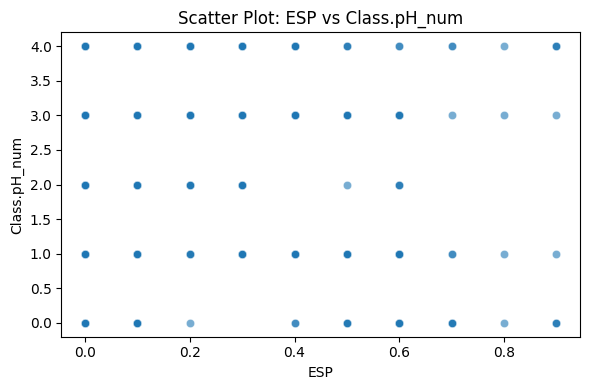

In [41]:
for col in features:
    if col == "Class.pH_num":
        continue  # skip target

    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[col], y=df_new["Class.pH_num"], alpha=0.6)
    plt.title(f"Scatter Plot: {col} vs Class.pH_num")
    plt.xlabel(col)
    plt.ylabel("Class.pH_num")

    plt.tight_layout()
    plt.show()

# Innovation: Current Best Feature Selection

c:\Users\justi\anaconda3\envs\pytorch\lib\site-packages\xgboost\training.py:183: UserWarning: [14:43:33] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


{'Ca': 6.090865135192871, 'ESP': 3.4754133224487305, 'P': 2.8439536094665527, 'CEC': 2.312741279602051, 'K': 2.191685199737549, 'SAR': 2.1226413249969482, 'Mg': 1.9880725145339966, '% Ca': 1.9262090921401978, 'ESP_calculated': 1.9214614629745483, '% Mg': 1.8697577714920044, 'CLAY': 1.6916859149932861, 'Na': 1.5962599515914917, 'SAND': 1.5915125608444214, 'N': 1.5089253187179565, '% K': 1.4212141036987305, 'SILT': 1.4107266664505005, 'EC': 1.3278063535690308, 'BD': 1.2717370986938477, 'OM': 1.2419463396072388}


<Figure size 800x500 with 0 Axes>

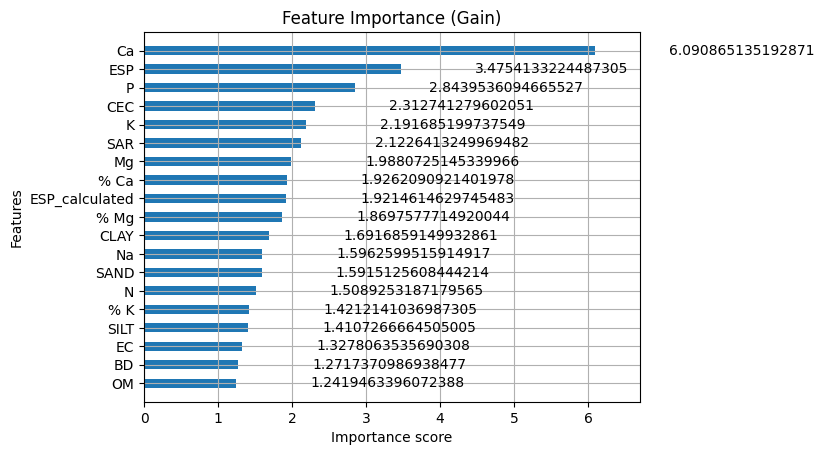

In [44]:
from xgboost import XGBClassifier, plot_importance

newfeatures = ['EC', 'OM', 'BD', 'P', 'SAND', 'SILT', 'CLAY', 'N', 'K', 'Ca', 'Mg', 'Na', 'CEC', 'SAR', '% Ca', '% Mg', '% K', 'ESP', 'ESP_calculated']

# Prepare data for model training
X = df_new[newfeatures]
y = df_new["Class.pH_num"]

# Initialize the model
model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    random_state=42,
    use_label_encoder=False,
    eval_metric="mlogloss"
)

# Train the model
model.fit(X, y)

# Get feature importances by GAIN
importances = model.get_booster().get_score(importance_type='gain')

# Sort and display feature importances
importances = dict(sorted(importances.items(), key=lambda x: x[1], reverse=True))
print(importances)

# Visualize the feature importances
plt.figure(figsize=(8,5))
plot_importance(model, importance_type='gain', max_num_features=24, height=0.5)
plt.title("Feature Importance (Gain)")
plt.show()

This aligns with the information obtained from the literature review, where Organic Matter (OM) does not have a significant impact on pH (for more details, refer to the paper). Based on the feature importance above, there are no variables that significantly affect pH except for Calcium (Ca). Therefore, we will discard the variables with the bottom three importance scores (below 1.4) to prevent the model from becoming too weak in predicting soil conditions in other scenarios.

We will also remove ESP_calculated since it turnsout rounded ESP considered more important based on gain feature importances.

In [45]:
df_new2 = df_new.copy()

df_new2.drop(columns=["EC", "BD", "OM", "SILT", "ESP_calculated"], inplace=True)
gain_features = [c for c in df_new2.columns if c != "Class.pH_num"]
gain_features

['P',
 'SAND',
 'CLAY',
 'N',
 'K',
 'Ca',
 'Mg',
 'Na',
 'CEC',
 'SAR',
 'ESP',
 '% Ca',
 '% Mg',
 '% K']

# Train Model (Prone to overfit)


After Completing the analysis of data and perfom feature cleaning and selection, we are now ready to train the model. However, there is one last thing to cover, which is the wildly imbalanced data.

To avoid using syntethic datas, we prefer not to use SMOTE. Instead, we use RandomOverSampler which use the copy of the same real datas.

In [48]:
#Balancing dataset
from imblearn.over_sampling import RandomOverSampler

ov = RandomOverSampler(random_state=42)

In [49]:
#Additional necessary libraries for model training

from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

In [50]:
#Train Model

X = df_new2[gain_features]
y = df_new2['Class.pH_num']
X_resampled, y_resampled = ov.fit_resample(X, y)

# --- 2) Train/valid/test split (stratified)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

mlp_base = Pipeline([
    ("scaler", StandardScaler(with_mean=True)),
    ("mlp", MLPClassifier(
        hidden_layer_sizes=(128, 64),
        activation="relu",
        solver="adam",
        alpha=1e-4,           # L2 regularization (lasso), which adds alpha to mlp model so it will keep model from fitting too much to train data(overfitting)
        learning_rate="adaptive",
        max_iter=500,
        random_state=42
    ))
])

rf_base = Pipeline([
    ("rf", RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        max_features="sqrt",
        bootstrap=True,
        n_jobs=-1,
        random_state=42,
        class_weight="balanced"
    ))
])

XGBoost = XGBClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    use_label_encoder=False
)

stack = StackingClassifier(
    estimators=[("mlp", mlp_base), ("rf", rf_base), ("XGB", XGBoost)],
    final_estimator=LogisticRegression(C = 1.0, max_iter=10000),
    passthrough=False,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1
)

stack.fit(X_train, y_train)

,estimators,"[('mlp', ...), ('rf', ...), ...]"
,final_estimator,LogisticRegre...ax_iter=10000)
,cv,StratifiedKFo... shuffle=True)
,stack_method,'auto'
,n_jobs,-1
,passthrough,False
,verbose,0
,copy,True
,with_mean,True
,with_std,True
,hidden_layer_sizes,"(128, ...)"



Accuracy: 0.9012345679012346

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       162
           1       0.82      0.88      0.85       162
           2       0.87      0.88      0.88       162
           3       0.86      0.79      0.83       162
           4       0.96      0.96      0.96       162

    accuracy                           0.90       810
   macro avg       0.90      0.90      0.90       810
weighted avg       0.90      0.90      0.90       810



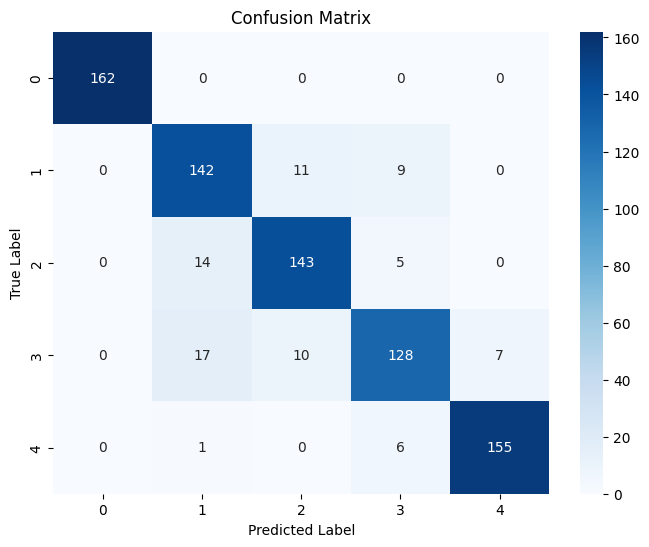

In [51]:
# Model Evaluation

y_pred = stack.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Re-Train with Regularization

In [52]:
#Train with Regularization

mlp_base = Pipeline([
    ("scaler", StandardScaler(with_mean=True)),
    ("mlp", MLPClassifier(
        hidden_layer_sizes=(128, 64),
        activation="relu",
        solver="adam",
        alpha=1e-4,           # L2 regularization (lasso), which adds alpha to mlp model so it will keep model from fitting too much to train data(overfitting)
        learning_rate="adaptive",
        max_iter=500,
        random_state=42,
        early_stopping=True,  # Enable early stopping
        validation_fraction=0.2,
        n_iter_no_change=10,
        warm_start=True
      ))
])

rf_base = Pipeline([
    ("rf", RandomForestClassifier(
        n_estimators=300,
        max_depth=10,  # Regularization depth for tree-based model
        min_samples_split=4,  # Splitting requires more samples (best for reducing overfit, model would not easily split with tiny samples)
        min_samples_leaf=2,  # Minimum samples required in leaf nodes
        max_features="sqrt",
        bootstrap=True,
        n_jobs=-1,
        random_state=42,
        class_weight="balanced"
    ))
])

XGBoost = XGBClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    use_label_encoder=False
)

stack = StackingClassifier(
    estimators=[("mlp", mlp_base), ("rf", rf_base), ("XGB", XGBoost)],
    final_estimator=LogisticRegression(C = 1.0, max_iter=10000),
    passthrough=False,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1
)

stack.fit(X_train, y_train)

,estimators,"[('mlp', ...), ('rf', ...), ...]"
,final_estimator,LogisticRegre...ax_iter=10000)
,cv,StratifiedKFo... shuffle=True)
,stack_method,'auto'
,n_jobs,-1
,passthrough,False
,verbose,0
,copy,True
,with_mean,True
,with_std,True
,hidden_layer_sizes,"(128, ...)"



Accuracy: 0.8358024691358025

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       162
           1       0.75      0.83      0.79       162
           2       0.75      0.81      0.78       162
           3       0.81      0.68      0.74       162
           4       0.92      0.89      0.91       162

    accuracy                           0.84       810
   macro avg       0.84      0.84      0.84       810
weighted avg       0.84      0.84      0.84       810



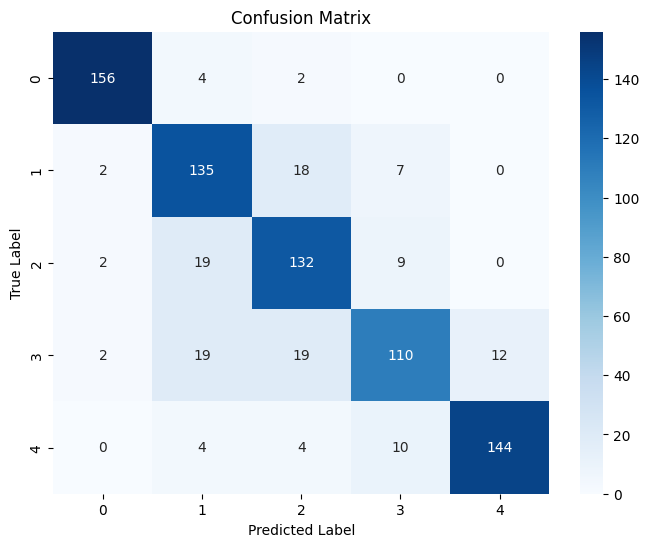

In [53]:
# Model Evaluation

y_pred = stack.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Finally, after having the regularization, even we lost some performance, at least we got the well fit model. It is better to have the well fit model not only in a paper but also could be applicable, and regularization ensure that.

# Optimization - Hyperparameters Tuning (FINAL MODEL)

In this one, we experiment with changing the values of critical structure and regularization such as layer sizes and alpha for mlp, then n_estimators for both random forest and XGBoost model. We are gonna be doing this carefully so the regularization won't break resulting to overfitting model.

In [54]:
#Train with Regularization

mlp_base = Pipeline([
    ("scaler", StandardScaler(with_mean=True)),
    ("mlp", MLPClassifier(
        hidden_layer_sizes=(128, 64),
        activation="relu",
        solver="adam",
        alpha=1e-3,           # L2 regularization (lasso), which adds alpha to mlp model so it will keep model from fitting too much to train data(overfitting)
        learning_rate="adaptive",
        max_iter=500,
        random_state=42,
        early_stopping=True,  # Enable early stopping
        validation_fraction=0.2,
        n_iter_no_change=10,
        warm_start=True
      ))
])

rf_base = Pipeline([
    ("rf", RandomForestClassifier(
        n_estimators=300,
       max_depth=10,  # Regularization depth for tree-based model
        min_samples_split=4,  # Splitting requires more samples (best for reducing overfit, model would not easily split with tiny samples)
        min_samples_leaf=2,  # Minimum samples required in leaf nodes
        max_features="sqrt",  # Consider square root(features) for splits
        bootstrap=True,
        n_jobs=-1,
        random_state=42,
        class_weight="balanced"
    ))
])

XGBoost = XGBClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    use_label_encoder=False
)

stack = StackingClassifier(
    estimators=[("mlp", mlp_base), ("rf", rf_base), ("XGB", XGBoost)],
    final_estimator=LogisticRegression(C = 1.0, max_iter=10000),
    passthrough=False,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1
)

stack.fit(X_train, y_train)

,estimators,"[('mlp', ...), ('rf', ...), ...]"
,final_estimator,LogisticRegre...ax_iter=10000)
,cv,StratifiedKFo... shuffle=True)
,stack_method,'auto'
,n_jobs,-1
,passthrough,False
,verbose,0
,copy,True
,with_mean,True
,with_std,True
,hidden_layer_sizes,"(128, ...)"



Accuracy: 0.828395061728395

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       162
           1       0.75      0.83      0.79       162
           2       0.74      0.81      0.77       162
           3       0.79      0.67      0.72       162
           4       0.92      0.89      0.90       162

    accuracy                           0.83       810
   macro avg       0.83      0.83      0.83       810
weighted avg       0.83      0.83      0.83       810



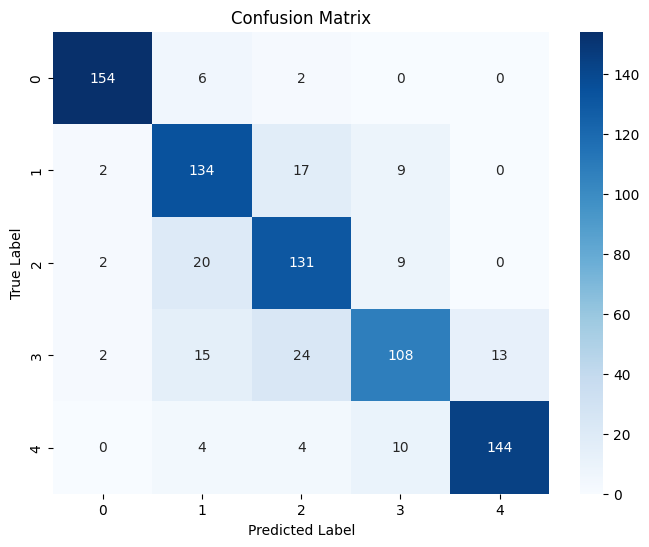

In [55]:
# Model Evaluation

y_pred = stack.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Above here is the first experiment of optimization (layers size and alpha is changed). In furher tuning, it will be better, we will continue from here.

In [56]:
#Train with Regularization

mlp_base = Pipeline([
    ("scaler", StandardScaler(with_mean=True)),
    ("mlp", MLPClassifier(
        hidden_layer_sizes=(256, 128),
        activation="relu",
        solver="adam",
        alpha=1e-3,           # L2 regularization (lasso), which adds alpha to mlp model so it will keep model from fitting too much to train data(overfitting)
        learning_rate="adaptive",
        max_iter=500,
        random_state=42,
        early_stopping=True,  # Enable early stopping
        validation_fraction=0.2,
        n_iter_no_change=10,
        warm_start=True
      ))
])

rf_base = Pipeline([
    ("rf", RandomForestClassifier(
        n_estimators=300,
       max_depth=10,  # Regularization depth for tree-based model
        min_samples_split=4,  # Splitting requires more samples (best for reducing overfit, model would not easily split with tiny samples)
        min_samples_leaf=2,  # Minimum samples required in leaf nodes
        max_features="sqrt",  # Consider square root(features) for splits
        bootstrap=True,
        n_jobs=-1,
        random_state=42,
        class_weight="balanced"
    ))
])

XGBoost = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    use_label_encoder=False
)

stack = StackingClassifier(
    estimators=[("mlp", mlp_base), ("rf", rf_base), ("XGB", XGBoost)],
    final_estimator=LogisticRegression(C = 1.0, max_iter=10000),
    passthrough=False,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1
)

stack.fit(X_train, y_train)

,estimators,"[('mlp', ...), ('rf', ...), ...]"
,final_estimator,LogisticRegre...ax_iter=10000)
,cv,StratifiedKFo... shuffle=True)
,stack_method,'auto'
,n_jobs,-1
,passthrough,False
,verbose,0
,copy,True
,with_mean,True
,with_std,True
,hidden_layer_sizes,"(256, ...)"



Accuracy: 0.8876543209876543

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       162
           1       0.81      0.90      0.85       162
           2       0.85      0.87      0.86       162
           3       0.87      0.72      0.79       162
           4       0.95      0.96      0.95       162

    accuracy                           0.89       810
   macro avg       0.89      0.89      0.89       810
weighted avg       0.89      0.89      0.89       810



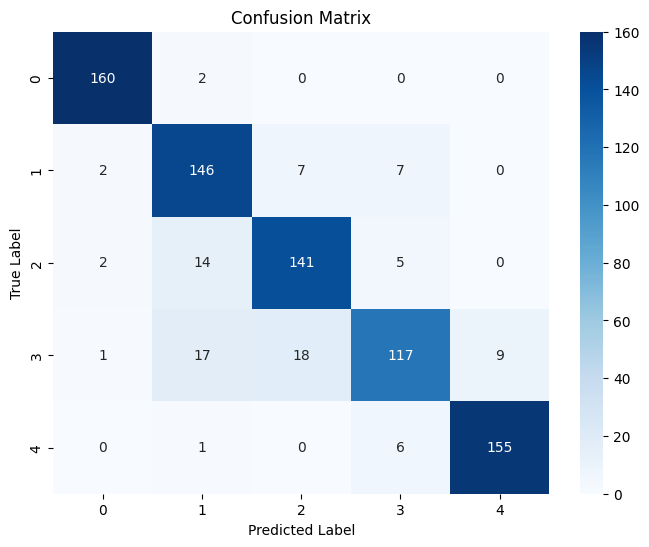

In [57]:
# Model Evaluation

y_pred = stack.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Turns out, after few tuning, the performance increases rapidly almost reaching it's condition before regularization. The optimization stops here, it could be not the best model in performance, but these deep analysis of relationship between data, regularization, and optimization managed to build a well fit model that could functioned not only in paper but in real world scenario.

In [59]:
#Saving Model

import joblib
joblib.dump(stack, "Ensemble (Multi-Layer Perceptrons, XGBoost, Random Forest).pkl")

['Ensemble (Multi-Layer Perceptrons, XGBoost, Random Forest).pkl']

# Prediction on Test Set

To close the research notebook that has been done by Dataforce team, we would like to deliver the preset of data preprocessing for test set and real-world datas.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
#Import Model

import joblib
model = joblib.load("Three-Model Stacking Ensemble.pkl")

In [ ]:
# Load Dataset

df = pd.read_excel("/content/fortex_test_dataforce.xlsx")
df.head()

,ID,EC,OM,BD,P,SAND,SILT,CLAY,N,K,Ca,Mg,Na,CEC,SAR,ESP
0,4769.0,1.9,1.8,1.6,6.00,6.0,28.7,65.2,0.10,1.3,49.3,7.0,2.0,34.8,0.1,0.10
1,4770.0,0.3,4.1,1.5,30.12,4.8,52.0,43.2,0.10,1.7,35.0,16.8,5.4,64.6,0.2,0.10
2,4774.0,2.1,1.8,1.3,23.60,6.3,22.0,12.0,30.12,1.1,5.1,0.8,0.4,39.9,0.1,0.00
3,26.1,0.3,2.1,1.6,10.10,19.5,22.7,57.8,0.10,2.2,55.5,8.5,1.8,49.9,0.0,0.00
4,4776.0,0.4,1.5,1.4,8.10,13.1,19.1,66.0,0.10,2.4,31.6,8.4,1.9,54.9,0.1,30.12


In [ ]:
#initial drop

df = df.reset_index(drop=True)
df = df.drop(columns=["ID"])

Data Preprocessing

In [ ]:
features = ["EC","OM","BD","P","SAND","SILT","CLAY",
            "N","K","Ca","Mg","Na","CEC","SAR","ESP"]

In [ ]:
#z-score outliers deletion

z_scores = np.abs((df[features] - df[features].mean()) / df[features].std())
threshold = 4

df_z = df[(z_scores <= threshold).all(axis=1)].copy()

print("Jumlah baris sebelum:", df.shape[0])
print("Jumlah baris setelah :", df_z.shape[0])

Jumlah baris sebelum: 1007
Jumlah baris setelah : 832


In [ ]:
#Imputation
df_imputed = df.copy()

for col in df_imputed.columns:
    if df_imputed[col].dtype != "object":
        median_val = df_imputed[col].median()
        df_imputed[col] = df_imputed[col].fillna(median_val)

In [ ]:
df_new = df_imputed.copy()
df_new['BaseStat'] = df_new['Ca'] + df_new['Mg'] + df_new['K'] + df_new['Na']

df_new['% Ca'] = round(((df_new['Ca'] / df_new['BaseStat']) * 1), 4)
df_new['% Mg'] = round(((df_new['Mg'] / df_new['BaseStat']) * 1), 4)
df_new['% K'] = round(((df_new['K'] / df_new['BaseStat']) * 1), 4)
df_new = df_new.drop(columns=['BaseStat'])

In [ ]:
df_new2 = df_new.copy()

df_new2.drop(columns=["EC", "BD", "OM", "SILT"], inplace=True)
gain_features = [c for c in df_new2.columns if c != "Class.pH_num"]

Model Prediction

In [ ]:
X_test = df_new2[gain_features]

In [ ]:
# Model Import

y_pred = stack.predict(X_test)

df_new2['prediction'] = y_pred
df_new2

,P,SAND,CLAY,N,K,Ca,Mg,Na,CEC,SAR,ESP,% Ca,% Mg,% K,prediction
0,6.00,6.0,65.2,0.10,1.3,49.3,7.0,2.0,34.8,0.1,0.10,0.8272,0.1174,0.0218,3
1,30.12,4.8,43.2,0.10,1.7,35.0,16.8,5.4,64.6,0.2,0.10,0.5942,0.2852,0.0289,3
2,23.60,6.3,12.0,30.12,1.1,5.1,0.8,0.4,39.9,0.1,0.00,0.6892,0.1081,0.1486,0
3,10.10,19.5,57.8,0.10,2.2,55.5,8.5,1.8,49.9,0.0,0.00,0.8162,0.1250,0.0324,3
4,8.10,13.1,66.0,0.10,2.4,31.6,8.4,1.9,54.9,0.1,30.12,0.7133,0.1896,0.0542,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,10.70,15.5,50.5,0.10,0.6,17.1,2.5,0.1,10.5,0.0,0.00,0.8424,0.1232,0.0296,4
1003,12.60,68.9,17.1,30.12,0.9,20.8,2.8,0.5,10.5,0.0,0.00,0.8320,0.1120,0.0360,3
1004,6.30,24.9,55.2,0.10,1.9,12.2,7.9,6.4,59.7,0.2,0.10,0.4296,0.2782,0.0669,3
1005,3.00,30.9,51.2,0.10,0.5,23.2,11.2,1.2,58.1,0.1,0.00,0.6427,0.3102,0.0139,1


In [ ]:
#If you have the true value and would like to test the accuracy, you can uncomment these code.

# print("Accuracy:", accuracy_score(y_test, y_pred))

# print("\nClassification Report:\n")
# print(classification_report(y_test, y_pred))

# conf_matrix = confusion_matrix(y_test, y_pred)

# # Visualize Confusion Matrix
# plt.figure(figsize=(8,6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.show()